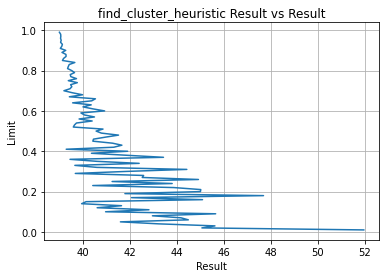

In [30]:
import heapq
import random
class PriorityQueue:
    def __init__(self):
        self.heap = []

    def push(self, element):
        heapq.heappush(self.heap, element)

    def pop(self):
        if self.is_empty():
            return None
        return heapq.heappop(self.heap)

    def is_empty(self):
        return len(self.heap) == 0

def popcount(num):
    count = 0
    while num != 0:
        count += num & 1
        num >>= 1
    return count

def find_cluster_heuristic(v,clusters):
    res = float('inf')
    final_path = []

    for cluster in clusters:
        sz = len(cluster)
        adj = [[] for _ in range(sz)]
        for j in range(sz):
            for k in range(j + 1, sz):
                wt = v[cluster[j][0]][cluster[k][0]]
                wt2 = v[cluster[k][0]][cluster[j][0]]
                adj[j].append((k, wt))
                adj[k].append((j, wt2))

        pq = PriorityQueue()
        cost = [[float('inf')] * (1 << sz) for _ in range(sz)]
        dl = 0

        for i in range(1, sz):
            pq.push((1/cluster[i][1], i, 1 << i, [i]))
            cost[i][1 << i] = 1/cluster[i][1]

        curr_ans = float('inf')
        this_path = []

        while not pq.is_empty():
            dist, node, mask, path = pq.pop()
            dist *= -1
            if node == dl:
                if dist < curr_ans:
                    curr_ans = dist
                    this_path = path

            for next, wt in adj[node]:
                next_mask = mask | (1 << next)
                if next == dl and popcount(next_mask) != sz:
                    continue

                curr_path = path + [next]
                if cost[node][mask] + wt*(1 + 1.0/cluster[next][1]) < cost[next][next_mask]:
                    cost[next][next_mask] = cost[node][mask] + wt*(1 + 1/(cluster[next][1]))
                    pq.push((-cost[next][next_mask], next, next_mask, curr_path))

        if curr_ans < res:
            res = curr_ans
            final_path = [cluster[k][0] for k in this_path]

    return res


n = 6
v = [
    [0, 4, 1, 80, 82, 90, 31],
    [3, 0, 5, 83, 85, 87, 32],
    [4, 2, 0, 100, 95, 92, 35],
    [83, 85, 97, 0, 5, 5, 60],
    [87, 79, 97, 4, 0, 11, 57],
    [91, 83, 90, 3, 9, 0, 63],
    [30, 31, 35, 60, 62, 65, 0]
]

def randomProp(fraction):
    while True:
        num = fraction + (1 - fraction) * random.random()
        yield num

import matplotlib.pyplot as plt

# limits = [x/100 for x in range(1, 100)]  # Generating limits from 0 to 1
# results = []

# for limit in limits:
#     getRandom=randomProp(limit)
#     clusters = [
#         [[6, float('inf')], [0, next(getRandom)], [1, next(getRandom)], [2, next(getRandom)]],
#         [[6, float('inf')], [3, next(getRandom)], [4, next(getRandom)], [5, next(getRandom)]]
#     ]
#     result = find_cluster_heuristic(v, clusters)
#     results.append(result)
# plt.plot(results,limits)
# plt.xlabel('Result')
# plt.ylabel('Limit')
# plt.title('find_cluster_heuristic Result vs Result')
# plt.grid(True)
# plt.show()



In [34]:
from deap import base, creator, tools, algorithms
import random

# Define NSGA-II framework
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Register your algorithm as the evaluation function for NSGA-II
toolbox.register("evaluate", find_cluster_heuristic)

# Define genetic operators (crossover, mutation, selection)
# You can use the default operators or define your own

def main():
    n = 6
    v = [
        [0, 4, 1, 80, 82, 90, 31],
        [3, 0, 5, 83, 85, 87, 32],
        [4, 2, 0, 100, 95, 92, 35],
        [83, 85, 97, 0, 5, 5, 60],
        [87, 79, 97, 4, 0, 11, 57],
        [91, 83, 90, 3, 9, 0, 63],
        [30, 31, 35, 60, 62, 65, 0]
    ]

    # Define randomProp and find_cluster_heuristic functions here

    limits = [x/100 for x in range(1, 101)]  # Generating limits from 0.01 to 1.0
    results = []

    for limit in limits:
        getRandom = randomProp(limit)
        clusters = [
            [[6, float('inf')], [0, next(getRandom)], [1, next(getRandom)], [2, next(getRandom)]],
            [[6, float('inf')], [3, next(getRandom)], [4, next(getRandom)], [5, next(getRandom)]]
        ]
        result = find_cluster_heuristic(v, clusters)
        results.append(result)

    # Run NSGA-II for each limit
    # Example code to run NSGA-II
    # population = toolbox.population(n=100)
    # algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=50, cxpb=0.7, mutpb=0.2, ngen=100)

    # Store or print results
    for i, result in enumerate(results, start=1):
        print(f"Limit {i}: {result}")

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'pymoo'